/opt/jlab-env/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       0.189242
1       0.173663
2      -0.059719
3      -0.031253
4      -0.065597
          ...   
2446   -0.047856
2447   -0.159065
2448   -0.071459
2449    0.200671
2450   -0.129212
Name: Baseload_EUR_MWh, Length: 2451, dtype: float64
[0.189242   0.17366349 0.05971923 ... 0.07145896 0.2006707  0.12921173]


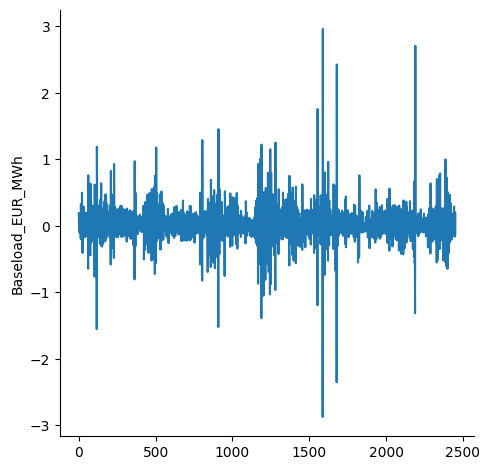

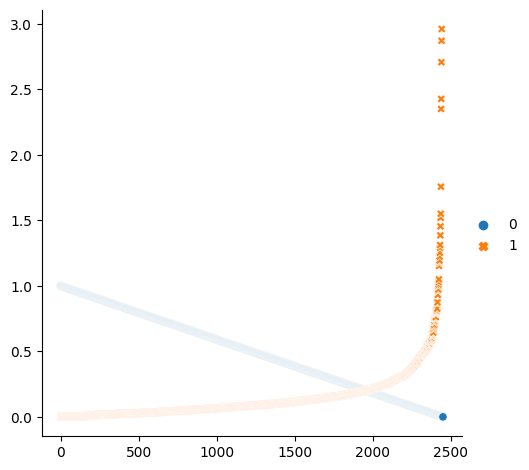

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.distributions.empirical_distribution as sm
import seaborn as sea

data = pd.read_csv("Data/ogd106_preise_strom_boerse.csv")
logreturns = np.log(data["Baseload_EUR_MWh"].shift(-1))-np.log(data["Baseload_EUR_MWh"])

sea.relplot(logreturns,kind="line")

print(logreturns[:2451])
print(np.abs(logreturns[:2451].dropna().to_numpy()))

myecdf = sm.ECDF(np.abs(logreturns[:2451].dropna().to_numpy()))

sea.relplot((1-myecdf.y,myecdf.x))